In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [20]:
fairgp_files = [
    ('../results/propublica-opp-odds_2018-09-21/propublica-recidivism_race_numerical-binsensitive-origin.csv', 'Propublica (race)'),
    ('../results/propublica-opp-odds_2018-09-21/propublica-recidivism_sex_numerical-binsensitive-origin.csv', 'Propublica (gender)'),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    tnr = parts[6]
    if not in_True and tnr != "0.717":
        return
    if in_True and tnr != "0.698":
        return
    optional_star = "*" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"FairGPparity{optional_star}, target={num}", not in_True

fairgp = ph.parse_all(fairgp_files, label_change)
data = fairgp

In [15]:
#data = ph.reorder_entries(data, [0, 1, 2, 3, 4, 5])

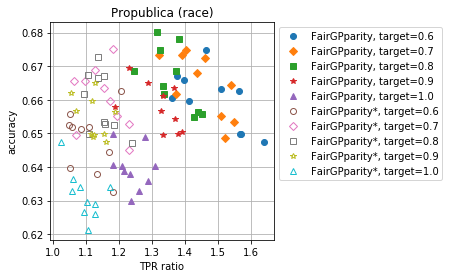

In [24]:
xaxis = ('race-TPRRatio', 'TPR ratio')
yaxis = ('accuracy', 'accuracy')
fig, plot = plt.subplots(figsize=(4, 4))
legend = ph.scatter(plot, data[0], xaxis, yaxis, legend_outside=True)
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/eqopp_acc_vs_tprratio.eps", dpi=200, bbox_extra_artists=[legend], bbox_inches='tight')

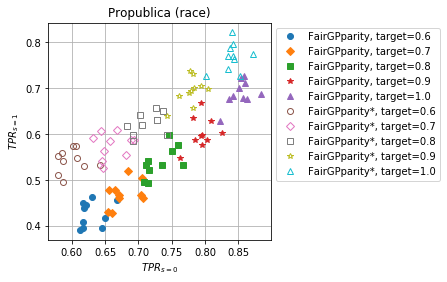

In [25]:
xaxis = ('0-TPR-race', '$TPR_{s=0}$')
yaxis = ('1-TPR-race', '$TPR_{s=1}$')
fig, plot = plt.subplots(figsize=(4, 4))
legend = ph.scatter(plot, data[0], xaxis, yaxis, legend_outside=True)
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/eqopp_0tpr_vs_1tpr.eps", dpi=200, bbox_extra_artists=[legend], bbox_inches='tight')